In [206]:
from a3_mod import * 
from matplotlib import pyplot as plt
from data_utils import load_dataset
from data_utils import plot_digit
import random

In [207]:
def get_minibatches(X, y, batch_size):
    X_mini_batches = [] 
    y_mini_batches = [] 
    total = np.hstack((X, y)) 
#     np.random.seed(0)
    np.random.shuffle(total) 
  
    for i in range((total.shape[0] // batch_size) ): 
        # Take batch_size amount of rows (sequentially, since we shuffled the data) and all columns 
        mini_batch = total[i*batch_size:(i+1)*batch_size, :] 
        X_mini = mini_batch[:, :-10] # Take all but last K column  
        y_mini = mini_batch[:, -10:] # Reshape last K column 

        X_mini_batches.append((X_mini))
        y_mini_batches.append((y_mini))
    
    # If there are remaining data points, create one more mini batch 
    if total.shape[0] % batch_size != 0: 
        mini_batch = total[i*batch_size:total.shape[0], :] 
        X_mini = mini_batch[:, :-10] 
        y_mini = mini_batch[:, -10:] 
        
        X_mini_batches.append((X_mini))
        y_mini_batches.append((y_mini))
    return [X_mini_batches,y_mini_batches] 

In [208]:
def update(W, grad, learn_rate):
    return (W - learn_rate*grad)

In [209]:
def run_Q2(iters, rate):
    # load the MNIST_small dataset
    x_train, x_valid, x_test, y_train, y_valid, y_test = load_dataset('mnist_small')
    # 100 neurons per hidden layer
    M = 100 
    batch_size = 250
    get_nn(x_train, x_valid, x_test, y_train, y_valid, y_test, M, batch_size, iters, rate, True)

In [217]:
def get_nn(x_train, x_valid, x_test, y_train, y_valid, y_test, M, batch_size, iters, rate, digit):
    # Return parameters
    nll_train = list()
    nll_valid = list()
    
    # Initialize the weights and biases 
    np.random.seed(0)
    W1 = np.random.randn(M, 784) / np.sqrt(784)
    np.random.seed(0)
    W2 = np.random.randn(M, M) / np.sqrt(M)
    np.random.seed(0)
    W3 = np.random.randn(10, M) / np.sqrt(M)
    b1 = np.zeros((M, 1)) # biases of first (hidden) layer
    b2 = np.zeros((M, 1)) # biases of second (hidden) layer
    b3 = np.zeros((10, 1)) # biases of third (output) layer
    
    # Training nll 
    X_mini_batches,y_mini_batches = get_minibatches(x_train, y_train, batch_size)

    min_nll = np.inf
    min_nll_it = 0
    
    for i in range(iters):
        if i % len(X_mini_batches) == 0:
            X_mini_batches,y_mini_batches = get_minibatches(x_train, y_train, batch_size)

        (nll, (W1_grad, W2_grad, W3_grad, b1_grad, b2_grad, b3_grad)) = \
            nll_gradients(W1, W2, W3, b1, b2, b3, X_mini_batches[i%len(X_mini_batches)], y_mini_batches[i%len(X_mini_batches)])

        # Update weights and biases 
        W1 = update(W1, W1_grad, rate)
        W2 = update(W2, W2_grad, rate)
        W3 = update(W3, W3_grad, rate)
        b1 = update(b1, b1_grad, rate)
        b2 = update(b2, b2_grad, rate)
        b3 = update(b3, b3_grad, rate)
        
        nll_train.append(nll/batch_size*10000) ## Normalize ??? 
        
        nll_v = negative_log_likelihood(W1, W2, W3, b1, b2, b3, x_valid,y_valid)
        nll_valid.append(nll_v)
        
        # Track min nll for validation set (and corresponding weights)
        if nll_v < min_nll:
            min_nll = nll_v
            min_nll_it = i
            W1_opt = W1
            W2_opt = W2
            W3_opt = W3
            B1_opt = b1
            B2_opt = b2
            B3_opt = b3
    
    if digit:
        Fhat = np.amax(np.exp(forward_pass(W1_opt, W2_opt, W3_opt, B1_opt, B2_opt, B3_opt, x_test)), axis=1)
        sort_ind = np.argsort(Fhat)
        sort_x_test = x_test[sort_ind]
#         print('Confidence', Fhat[sort_ind[-1]], 'BEST')

        for i in range(5):
            print('Confidence', Fhat[sort_ind[i]])
            plt.figure(i)
            plot_digit(sort_x_test[i])
            plt.savefig('test_digit_' + str(i)+ '.png')
    # Plot 
    plt.figure(6)
    plt.title('Neg Log-Likelihood with Mini-batch')
    plt.xlabel('Iterations')
    plt.ylabel('NLL')
    nll_train = [x / 10000 for x in nll_train]
    nll_valid = [x / 1000 for x in nll_valid]
    plt.plot(list(range(iters)), nll_train, label=('Train NLL '))
    plt.plot(list(range(iters)), nll_valid, label=('Valid NLL '))
    plt.legend()
    plt.savefig('Q3.png')
    
    # Print results 
    print('Best iteration ' + str(min_nll_it))
    print('Best NLL for validation ' + str(min_nll))
    print('Final Validation NLL ' + str(nll_train[-1]))
    print('Final Train NLL ' + str(nll_valid[-1]))
    return [nll_train, nll_valid]

Confidence 0.3460877235552828
Confidence 0.37881293144362604
Confidence 0.4006887694685873
Confidence 0.40756404158520687
Confidence 0.40858394805854087
Best iteration 3745
Best NLL for validation [176.73656921]
Final Validation NLL [0.02262166]
Final Train NLL [0.1781249]


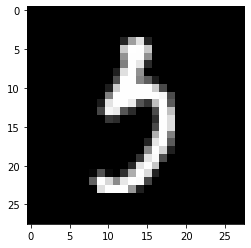

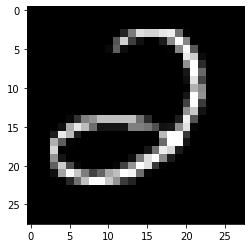

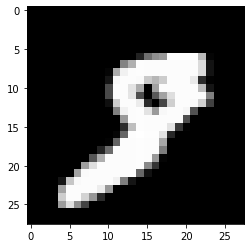

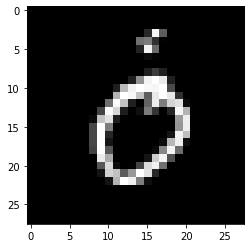

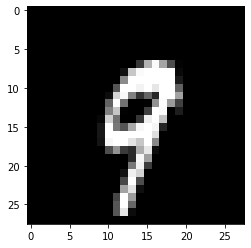

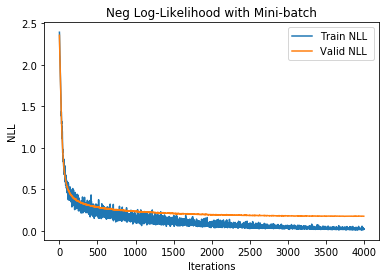

In [218]:
run_Q2(4000, 0.0001)

Confidence 0.28976460994282327
Confidence 0.3739938737543819
Confidence 0.3845689903045091
Confidence 0.43757937150108006
Confidence 0.4452782774787329
Best iteration 540
Best NLL for validation [144.85545433]
Final Validation NLL [0.00137908]
Final Train NLL [0.17119899]


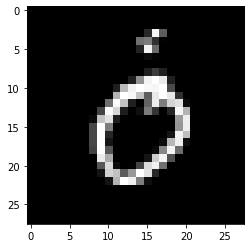

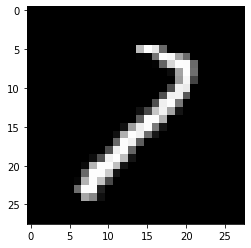

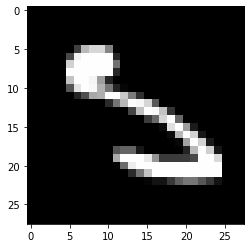

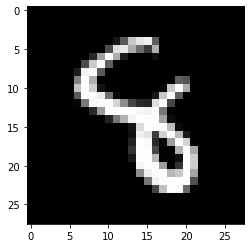

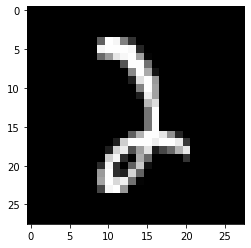

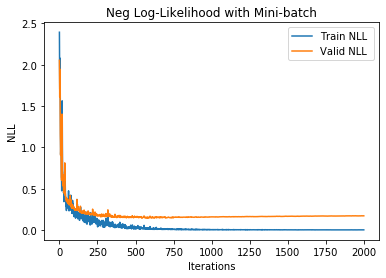

In [219]:
run_Q2(2000, 0.001)